# Import Basic Libararies

In [1]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# Import Dataset

In [2]:
# for showing maximum columns which are present in dataset
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv').drop_duplicates()

In [4]:
# show top 5 rows in dataset
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global orchard avenue,sector 93,0.40,7359.0,544.0,Carpet area: 543.53 (50.5 sq.m.),2,2,2,11.0,NaN,New Property,NaN,NaN,543.57695,0,0,0,0,0,0,37
1,flat,zara aavaas,sector 104,0.40,7029.0,569.0,Super Built up area 569(52.86 sq.m.),2,2,1,14.0,NaN,Relatively New,569.0,NaN,NaN,0,0,0,0,0,0,38
2,flat,ats triumph,sector 104,2.55,13076.0,1950.0,Super Built up area 3150(292.64 sq.m.)Carpet a...,4,4,3+,21.0,East,Relatively New,3150.0,NaN,1950.00000,0,1,0,0,0,0,150
3,flat,experion the heartsong,sector 108,1.65,8237.0,2003.0,Super Built up area 2003(186.08 sq.m.)Built Up...,3,4,3,3.0,North-West,Moderately Old,2003.0,1771.32,1302.01000,1,0,0,0,0,2,75
4,house,unitech deerwood chase,sector 50,8.45,235376.0,359.0,Plot area 359(33.35 sq.m.),3,3,2,2.0,North-East,Old Property,NaN,359.00,NaN,1,1,0,0,0,2,102


In [5]:
# show random 5 rows
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3362,flat,pareena coban residences,sector 99a,1.05,6774.0,1550.0,Super Built up area 1550(144 sq.m.)Built Up ar...,2,2,3,2.0,East,Relatively New,1550.0,1390.0,1240.0,1,0,0,0,0,0,49
3322,flat,indiabulls enigma,sector 110,3.49,10264.0,3400.0,Super Built up area 3400(315.87 sq.m.),4,5,3,7.0,North-West,Relatively New,3400.0,NaN,NaN,0,1,0,0,0,0,165
2296,flat,city shri ram apartments 1,sector 110,0.22,3666.0,600.0,Super Built up area 600(55.74 sq.m.),2,1,1,1.0,NaN,Relatively New,600.0,NaN,NaN,0,0,0,0,0,0,0
2623,house,independent,sector 31,3.69,23699.0,1557.0,Plot area 173(144.65 sq.m.),4,4,2,2.0,East,Moderately Old,NaN,173.0,NaN,1,1,0,1,0,2,75
401,flat,smart world orchard,sector 61,1.58,13739.0,1150.0,Carpet area: 1150 (106.84 sq.m.),2,2,2,3.0,South,New Property,NaN,NaN,1150.0,1,0,0,0,0,0,15


In [6]:
# shape of the data
df.shape

(3677, 23)

* Before Outliers treatment we have 3677 rows and 23 columns 

In [7]:
# columns in dataset where we have to do Outliers treatment
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

* In some columns we got categorical dataset so we not work on that ,we work on only Numerical dataset

## Price 

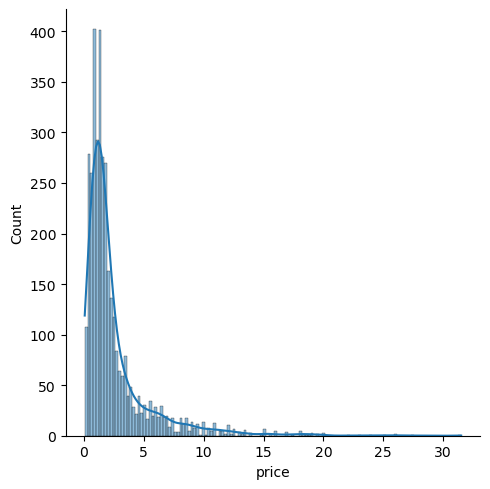

In [8]:
sns.displot(df['price'],kde=True)

* This Distplot shows that we have left skewed distribution, so we use IQR method for treatment of Outliers

<AxesSubplot:xlabel='price'>

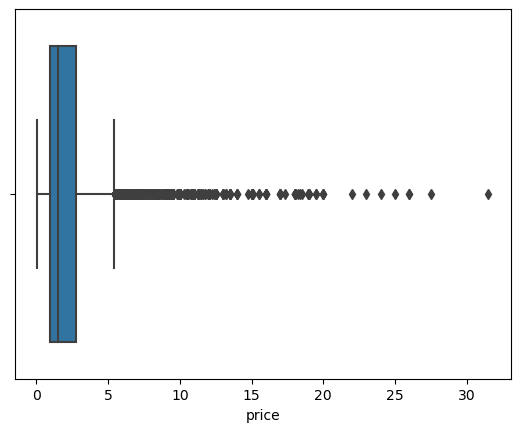

In [9]:
sns.boxplot(x=df['price'])

* Box plot shows there are so many outliers but in this dataset there are some genuine outliers as well so we look first into it.

In [10]:
# calculate the IQR for the price column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# identifying Outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats


(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [11]:
outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3773,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,1,74
1839,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,1254.0,NaN,1,1,0,1,1,2,42
2671,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,1,72
497,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,505.0,NaN,1,1,0,1,1,2,138
2700,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,0,0
783,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,2,122
1338,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,South-West,Relatively New,NaN,1000.0,NaN,1,1,1,1,0,2,145
371,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,0,1,0,0,0,0,54
761,house,luxury dlf city floors,sector 26,20.00,48889.0,4091.0,Plot area 500(418.06 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,500.0,NaN,0,1,0,0,0,2,31
155,house,dlf city plots,sector 26,20.00,44265.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,NaN,502.0,NaN,1,1,1,1,0,2,153


* On the basis of price cols we can say that there are some genuine outliers but there are some data errors as well

## Price_Per_Sqft

<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

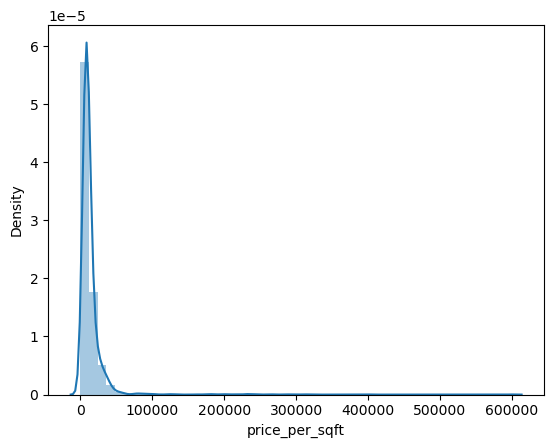

In [12]:
sns.distplot(df['price_per_sqft'])

* It shows Left skwed distribution,so we have to use IQR method for outliers Treatment

<AxesSubplot:xlabel='price_per_sqft'>

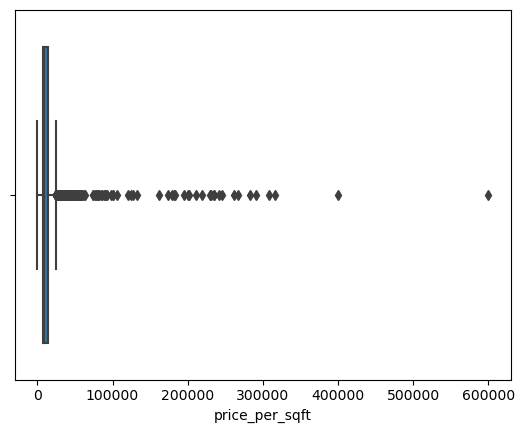

In [13]:
sns.boxplot(x=df['price_per_sqft'])

In [14]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [15]:
outliers_sqft

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
4,house,unitech deerwood chase,sector 50,8.45,235376.0,359.0,Plot area 359(33.35 sq.m.),3,3,2,2.0,North-East,Old Property,NaN,359.0,NaN,1,1,0,0,0,2,102
13,house,dlf city phase 1,sector 26,3.25,33129.0,981.0,Plot area 109(91.14 sq.m.),3,3,3,2.0,West,Old Property,NaN,109.0,NaN,1,0,0,0,0,0,79
15,house,eros rosewood city,sector 49,1.60,31481.0,508.0,Plot area 60(50.17 sq.m.),4,4,3,4.0,East,New Property,NaN,60.0,NaN,0,0,0,0,0,2,27
32,house,independent,sector 26,4.45,35185.0,1265.0,Plot area 150(125.42 sq.m.),4,4,3,3.0,West,Old Property,NaN,150.0,NaN,0,0,0,0,0,0,25
35,house,independent,sector 43,7.85,29074.0,2700.0,Plot area 300(250.84 sq.m.),9,9,3+,3.0,West,Relatively New,NaN,300.0,NaN,1,1,0,1,1,1,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3747,house,unitech deerwood chase,sector 50,15.00,33333.0,4500.0,Plot area 500(418.06 sq.m.),4,4,2,2.0,West,Moderately Old,NaN,500.0,NaN,0,1,0,0,0,0,160
3773,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,1,74
3788,house,independent,sector 4,1.25,78125.0,160.0,Built Up area: 160 (14.86 sq.m.),2,3,No,1.0,NaN,Undefined,NaN,160.0,NaN,0,0,0,0,0,0,0
3794,house,sushant lok 1 builder floors,sector 43,6.25,30728.0,2034.0,Plot area 226(188.96 sq.m.),7,7,3+,3.0,North,Moderately Old,NaN,226.0,NaN,1,1,1,0,0,0,46


* From above Data we can see that, where area is less than 1000 means, It needs unit conversion. 
* so we have to multiply with 9 which is less than 1000 so all values are in same unit that is sqft

In [16]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

In [17]:
outliers_sqft.sample(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2016,flat,dlf park place,sector 54,4.85,25866.0,1875.0,Super Built up area 1875(174.19 sq.m.),3,4,3+,25.0,South-East,Relatively New,1875.0,NaN,NaN,0,1,0,0,0,2,26
967,house,independent,sector 47,4.60,26620.0,1728.0,Plot area 192(160.54 sq.m.),7,6,3+,4.0,NaN,Moderately Old,NaN,192.0,NaN,0,0,0,0,0,1,51
1071,flat,puri the aravallis,sector 61,3.90,33209.0,1174.0,Carpet area: 1249.65 (116.1 sq.m.),3,4,3+,33.0,South,Undefined,NaN,NaN,1249.68879,0,1,0,0,0,0,158
1940,house,international city by sobha phase 2,sector 109,9.40,26111.0,3600.0,Plot area 400(334.45 sq.m.),5,6,3+,2.0,North-East,Relatively New,NaN,400.0,NaN,1,1,1,1,0,2,147
1648,house,uppal southend,sector 49,6.75,290948.0,2088.0,Plot area 232(21.55 sq.m.),12,12,3+,NaN,West,Moderately Old,NaN,232.0,NaN,1,1,0,1,1,2,49
1039,house,independent,sector 25,6.50,36111.0,1800.0,Plot area 200(167.23 sq.m.),4,4,3+,2.0,North-East,Moderately Old,NaN,200.0,NaN,1,1,1,1,0,0,61
2364,house,sector 14 rwa,sector 14,6.50,26000.0,2500.0,Plot area 2500(232.26 sq.m.),5,5,No,4.0,NaN,Moderately Old,NaN,2500.0,NaN,0,0,0,0,0,0,0
739,house,dlf city plots,sector 26,17.00,37627.0,4518.0,Plot area 502(419.74 sq.m.),5,6,3,2.0,North-West,Old Property,NaN,502.0,NaN,0,1,1,1,0,2,87
3536,house,independent,sector 43,8.50,31481.0,2700.0,Plot area 300(250.84 sq.m.),5,5,3,3.0,West,Moderately Old,NaN,300.0,NaN,0,1,0,0,0,2,113
2489,house,independent,sector 25,16.00,59259.0,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16,16,3+,4.0,West,New Property,NaN,325.0,300.00000,1,1,1,1,0,1,72


In [18]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

In [19]:
outliers_sqft['price_per_sqft'].describe()

count      354.000000
mean     29357.906780
std      12403.077309
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

* By all this steps we progressilly down the mean as a practical mean

In [20]:
# update this steps with main dataframe
df.update(outliers_sqft)

<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

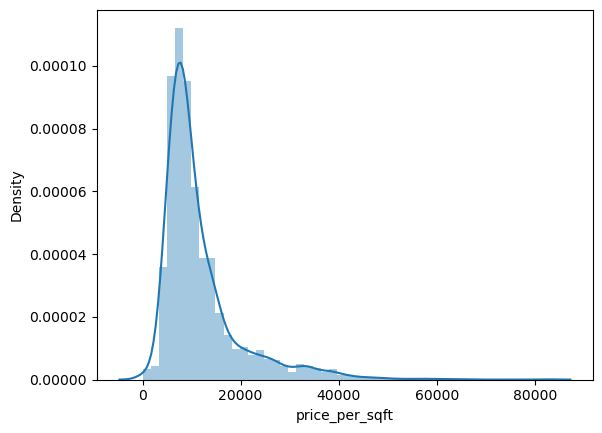

In [21]:
# Now plot distplot
sns.distplot(df['price_per_sqft'])

<AxesSubplot:xlabel='price_per_sqft'>

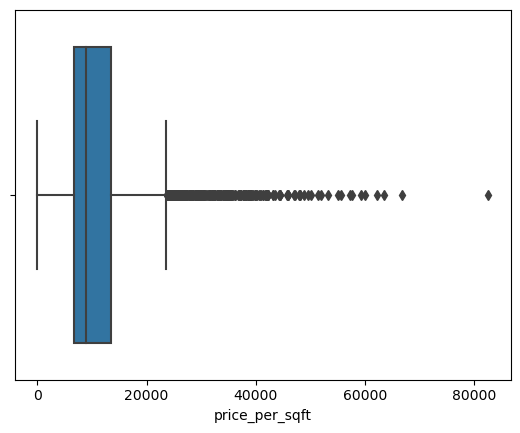

In [22]:
sns.boxplot(x=df['price_per_sqft'])

* But Now we have outliers which is Greater than 80000 price_per_sqft but this is not practical so we have to remove that. for that we have to mentioned range of 50000 price_per_sqft

In [23]:
df[df['price_per_sqft']>50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
159,house,cloudnine cottages,sohna road road,5.50,55000.0,1000.0,Plot area 1000(92.9 sq.m.),3.0,3.0,No,1.0,NaN,Moderately Old,NaN,1000.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188,house,emaar the palm springs,sector 54,14.00,62222.0,2250.0,Plot area 250(209.03 sq.m.),4.0,5.0,3+,2.0,North,Old Property,NaN,250.0,NaN,1.0,1.0,0.0,0.0,0.0,2.0,160.0
456,house,independent,sector 26,14.75,51864.0,2844.0,Plot area 316(264.22 sq.m.),16.0,20.0,3+,4.0,East,New Property,NaN,316.0,NaN,1.0,1.0,1.0,1.0,0.0,2.0,153.0
492,house,unitech escape,sector 50,10.80,60000.0,1800.0,Plot area 290(242.48 sq.m.)Built Up area: 250 ...,4.0,4.0,3,2.0,North,Relatively New,NaN,250.0,200.0,1.0,1.0,1.0,1.0,0.0,2.0,103.0
497,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6.0,7.0,3+,2.0,North-East,New Property,NaN,505.0,NaN,1.0,1.0,0.0,1.0,1.0,2.0,138.0
543,flat,unitech vistas,sector 70,9.00,57508.0,1565.0,Built Up area: 1565 (145.39 sq.m.),3.0,3.0,0,7.0,NaN,Undefined,NaN,1565.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
783,house,emaar the palm springs,sector 54,24.00,66667.0,3600.0,Plot area 400(37.16 sq.m.),5.0,5.0,2,1.0,North-East,Old Property,NaN,400.0,NaN,1.0,1.0,0.0,1.0,0.0,2.0,122.0
2021,house,project housing board colony,sector 31,8.00,63492.0,1260.0,Built Up area: 140 (117.06 sq.m.),2.0,1.0,No,1.0,NaN,Undefined,NaN,140.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2143,house,nul,sector 28,12.50,51440.0,2430.0,Plot area 270(225.75 sq.m.),16.0,17.0,3+,4.0,South,Relatively New,NaN,270.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,137.0
2489,house,independent,sector 25,16.00,59259.0,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16.0,16.0,3+,4.0,West,New Property,NaN,325.0,300.0,1.0,1.0,1.0,1.0,0.0,1.0,72.0


In [24]:
df = df[df['price_per_sqft'] <= 50000]

<AxesSubplot:xlabel='price_per_sqft'>

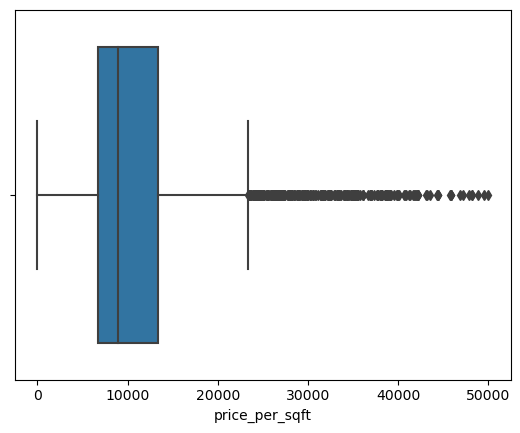

In [26]:
sns.boxplot(x=df['price_per_sqft'])

## Area

<AxesSubplot:xlabel='area', ylabel='Density'>

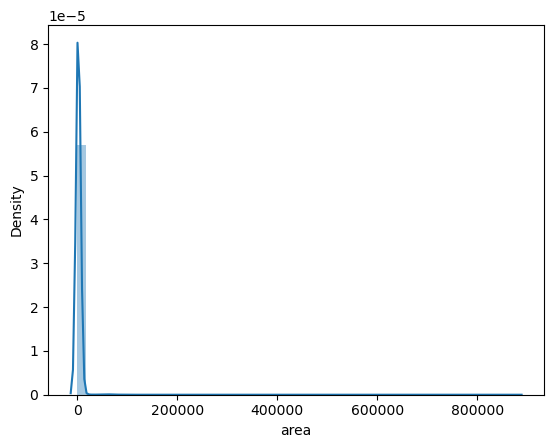

In [27]:
sns.distplot(df['area'])

<AxesSubplot:xlabel='area'>

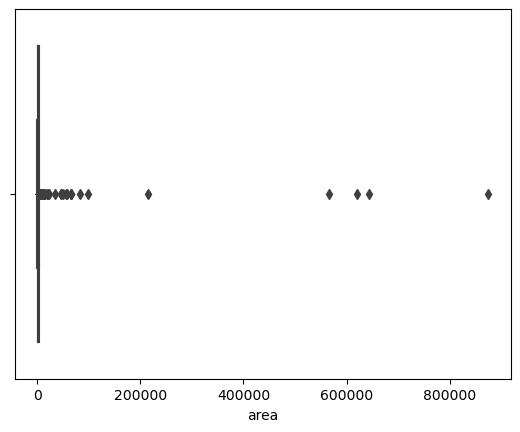

In [28]:
sns.boxplot(x=df['area'])

In [29]:
df['area'].describe()

count      3647.000000
mean       2947.723608
std       23208.194102
min         145.000000
25%        1262.000000
50%        1750.000000
75%        2350.000000
max      875000.000000
Name: area, dtype: float64

In [30]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1533,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2.0,2.0,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1.0,0.0,0.0,0.0,1.0,0.0,65.0
1988,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2.0,2.0,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,44.0
2537,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6.0,5.0,3+,2.0,NaN,New Property,NaN,2.0,NaN,1.0,1.0,0.0,1.0,1.0,2.0,0.0
2544,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2.0,2.0,1,3.0,North,New Property,NaN,NaN,514396.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0
3496,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2.0,2.0,2,2.0,South-West,New Property,NaN,NaN,569243.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0


In [31]:
df = df[df['area'] < 100000]

<AxesSubplot:xlabel='area', ylabel='Density'>

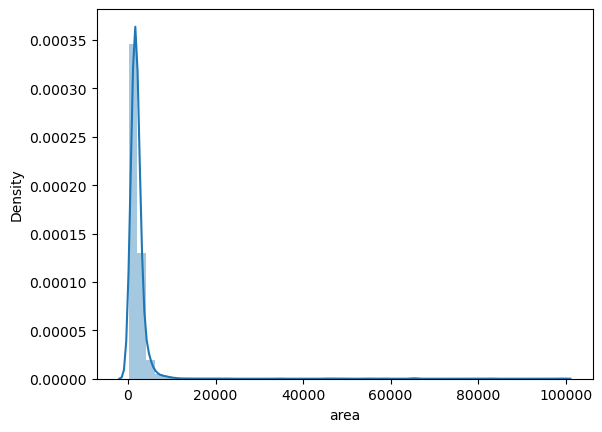

In [32]:
sns.distplot(df['area'])

<AxesSubplot:xlabel='area'>

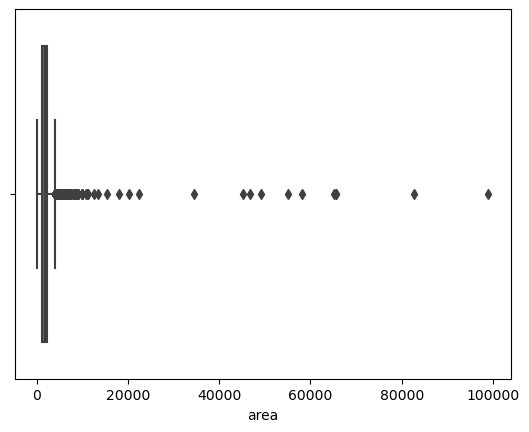

In [33]:
sns.boxplot(x=df['area'])

In [34]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2982,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0.0,1.0,1.0,1.0,0.0,2.0,60.0
2499,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,3.0,South-East,Old Property,NaN,115.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,7.0
3749,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,64412.00,0.0,0.0,0.0,0.0,0.0,0.0,51.0
267,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,64529.00,1.0,0.0,0.0,0.0,0.0,0.0,15.0
3176,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3163,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0.0,0.0,0.0,0.0,0.0,0.0,15.0
307,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0.0,0.0,0.0,0.0,0.0,0.0,37.0
2933,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1.0,0.0,0.0,0.0,0.0,0.0,37.0
1982,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0.0,1.0,1.0,0.0,0.0,2.0,109.0
1021,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0.0,0.0,0.0,0.0,1.0,0.0,33.0
